### 1. Даны два отсортированных списка, соедините их в один отсортированный список за минимальное возможное кол-во операций


    Входные данные: [1,2,3], [3,4,5]
    Выходные данные: [1,2,3,3,4,5]

    Входные данные: [1,1,1], [1,40,50]
    Выходные данные: [1,1,1,1,40,50]

In [1]:
# Функция, чтобы объединить два отсортированных списка
def merge(left_list, right_list):

    # Сюда будет записан результирующий отсортированный список
    sorted_list = []

    # поначалу оба индекса в нуле
    left_list_index = right_list_index = 0

    # Длина списков часто используется, поэтому создадим переменные для удобства
    left_list_length, right_list_length = len(left_list), len(right_list)

    # Проходим по всем элементам обоих списков. _ - просто обозначение неиспользуемой переменной
    # Цикл нужен, чтобы пройти все left_list_length + right_list_length элементов
    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:

            # Сравниваем первые элементы в начале каждого списка
            # Если первый элемент левого подсписка меньше, добавляем его
            # в отсортированный массив
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1

            # Если первый элемент правого подсписка меньше, добавляем его
            # в отсортированный массив
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # Если достигнут конец левого списка, элементы правого списка
        # добавляем в конец результирующего списка
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1

        # Если достигнут конец правого списка, элементы левого списка
        # добавляем в отсортированный массив
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list

list_1 = [1, 2, 3]
list_2 = [3, 4, 5]

merge(list_1, list_2)

[1, 2, 3, 3, 4, 5]

### 2. Дано натуральное число, что может означать зашифрованное им сообщение


Дано натуральное число которое означает последовательность цифр, набранных на кнопочном телефоне (печатали короткую СМСку на русском/английском языке, как вам удобнее). Вывести все варианты того, что может введенная последовательность означать.

    Входные данные: digits = "23"
    Выходные данные: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

+ усложнение (опциональное). Попробуйте расшифровать наиболее вероятные введенные слова (вопросы можно задавать)

In [2]:
dct = {
    '2':'abc', '3':'def', '4': 'ghi',  '5': 'jkl', 
    '6': 'mno', '7': 'pqrs', '8': 'tuv', '9': 'wxyz'
}

def translate(digits):
    res = []
    
    def __translateRecFn(digits, word, res):
        if digits == '':
            res.append(word)
            return

        for char in dct[digits[0]]:
            word += char
            __translateRecFn(digits[1:], word, res) 
            word = word[:-1] 
            
    __translateRecFn(str(digits), '', res)
    
    print(res)
    
translate(23)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


### 3. На вход принимается число N.  Выведите на печать следующий паттерн:

1

1 2

1 2 3

1 2 3 4

...

1 ... N

In [3]:
N = 9
counter = 1
path = ''

while (counter <= N):
    path += str(counter)
    counter += 1
    print('{}\n'.format(path))

1

12

123

1234

12345

123456

1234567

12345678

123456789



### 4. Посчитать среднюю метрику X-DSPAM-Confidence для письма. 
### (Кажется, это что-то похожее на вероятность того, что письмо - не спам)

Воспользуйтесь предыдущим кодом, достаньте те строчки, где эта метрика записана и подсчитайте ее среднее значение

In [24]:
import requests

conf_value_pattern = '(-?\d+(\.\d*)?)|(-?\.\d+)'

p = re.compile(conf_value_pattern)

result = []

info_request = requests.get('http://www.py4inf.com/code/mbox.txt').text
for line in info_request.splitlines():
    if line.startswith('X-DSPAM-Confidence:'):
        conf = p.search(line)
        result.append(float(conf.group()))
        
sum(result) / len(result)

0.8941280467445736

### 5. Объединение словарей

Напишите программу, которая подсчитывает значения из произвольного списка словарей следующего вида.

Ввод:

    shops = [{'товар': 'яблоки', 'количество': 400}, {'товар': 'конфеты', 'количество': 300}, {'товар': 'яблоки', 'количество': 750}]


Вывод:

    {'яблоки': 1150, 'конфеты': 300}

In [18]:
shops = [
    {
        'товар': 'яблоки', 
        'количество': 400
    }, 
    {
        'товар': 'конфеты', 
        'количество': 300
    }, 
    {
        'товар': 'яблоки', 
        'количество': 750
    }
]

count_dict = {}

for shop in shops:
    key = shop['товар']
    
    if(key in count_dict):
        count_dict[key] += shop['количество']
    else:
        count_dict[key] = shop['количество']
    
count_dict

{'яблоки': 1150, 'конфеты': 300}

### 6. Про Поросёнка Петра

На плоскости в точке (0,0) стоит Поросёнок Пётр. Он умеет ходить налево, направо, вверх и вниз. Расстояние его прохода в какую-либо сторону измеряется в шагах. Когда он идет вправо, его первая координата увеличивается, когда влево - уменьшается. Когда он идет вверх, его вторая координата увеличивается, а когда вниз - уменьшается. 

С клавиатуры считывается число N - число ходов, которые сделает Пётр. После чего на каждом шаге спрашивается, сколько шагов и в какую сторону за этот ход Пётр сделает. Так происходит, пока Пётр не осуществит все N ходов.

Программа должна вывести, сколько шагов Пётр должен был бы сделать, чтобы кратчайшим путем прибыть из свое начальной точки (0,0) в свою конечную точку. Напоминание: Пётр умеет ходить только вверх-вниз, и влево-вправо, но не по диагонали.

Пример ввода: 

    Введите N: 3
    Ход 1: Вверх 1
    Ход 2: Вниз 1
    Ход 3: Вверх 1
    
Пример вывода:

    Пётр находится на расстоянии 1 от (0,0)

In [83]:
start_pos = { 
    'x': 0, 
    'y': 0 
}

N = int(input('Введите N (число ходов:)'))

for step in range(N):
    current_move = input(f'Ход {step + 1}: ')
    move_direction, step_count = current_move.split()
    if (move_direction == 'Вверх'):
        start_pos['y'] += int(step_count)
    elif (move_direction == 'Вниз'):
        start_pos['y'] -= int(step_count)
    elif (move_direction == 'Вправо'):
        start_pos['x'] += int(step_count)
    elif (move_direction == 'Вправо'):
        start_pos['x'] -= int(step_count)

x_abs = abs(start_pos['x'])
y_abs = abs(start_pos['y'])

print(f'Петр находится на расстоянии {x_abs + y_abs } от (0,0)')

Введите N (число ходов:)3
Ход 1: Вверх 1
Ход 2: Вниз 1
Ход 3: Вверх 1
Петр находится на расстоянии 1 от (0,0)


### 7. Camel Case to snake case

Мы уже довольно много говорили про то, что в компаниях могут быть конвенции по обозначению переменных. Что, если вы написали код, а в нем переменные названы в Camel Case а вам требуется snake case? Пожалуй, стоит автоматизировать этот процесс. Напишите функцию, которая переводит название в camel case в название в snake case

In [49]:
#Camel case to snake case
v = 'camelCaseVar'
import re
re.sub(r'(?<!^)(?=[A-Z])', '_', v).lower()

'camel_case_var'

### 8. Про время (время неистово гуглить)
Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [95]:
import re

inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

hh_mm_ss_pattern = '(?:[01]\d|2[0-3]):(?:[0-5]\d):(?:[0-5]\d)'
hh_mm_pattern = '(0[0-9]|1[0-9]|2[0-3]):[0-5][0-9]'

out = re.sub(f'{hh_mm_ss_pattern}|{hh_mm_pattern}', '(TBD)', inp)

print(out)

Уважаемые! Если вы к (TBD) не вернёте 
чемодан, то уже в (TBD) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


### 9. Про финансовую отчетность (время неистово гуглить)

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [72]:
import re

inp = """
Было закуплено 12 единиц техники 
по 410.37 рублей.
"""

float_pattern = '[-+]?(?:\d*\.*\d+)'

out = re.sub(float_pattern, lambda i: str(float(i.group())**3), inp)

print(out)


Было закуплено 1728.0 единиц техники 
по 69107759.437653 рублей.



### 10. Проверим закон Ципфа

В 1935, лингвист Джордж Ципф отметил, что в любом большом тексте *n*-тое наиболее часто встречающееся слово появляется с частотой  ~ 1/*n* от частоты наиболее часто встречающегося слова. Это наблюдение получило название *Закона Ципфа*, несмотря на то, что Феликс Ауэрбах заметил это еще в 1913 году.  Если нарисовать частоты слов в произвольном тексте, начиная от самого часто встречающегося, на log-log-графике, они должны приблизительно следовать прямой линии, если закон Ципфа верен.  Проверьте это :) В качестве примера текста предлагается Идиот Достоевского.

In [2]:
import re
import requests

the_idiot_url = 'https://www.gutenberg.org/cache/epub/2638/pg2638-images.html'
raw = requests.get(the_idiot_url)
txt = raw.text

# Индекс начала первой главы
start = re.search(r'Towards the end of November', txt).start()
# Индекс конца первой главы
end = re.search(r'to take a droshky', txt).end()
start, end

(6453, 31004)

In [3]:
frequency = {}
words = re.findall('\w+', txt[start:end])

for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [4]:
from operator import itemgetter

sorted_freq = {}
threshold = 10

for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    if(value > threshold):
        sorted_freq[key] = value

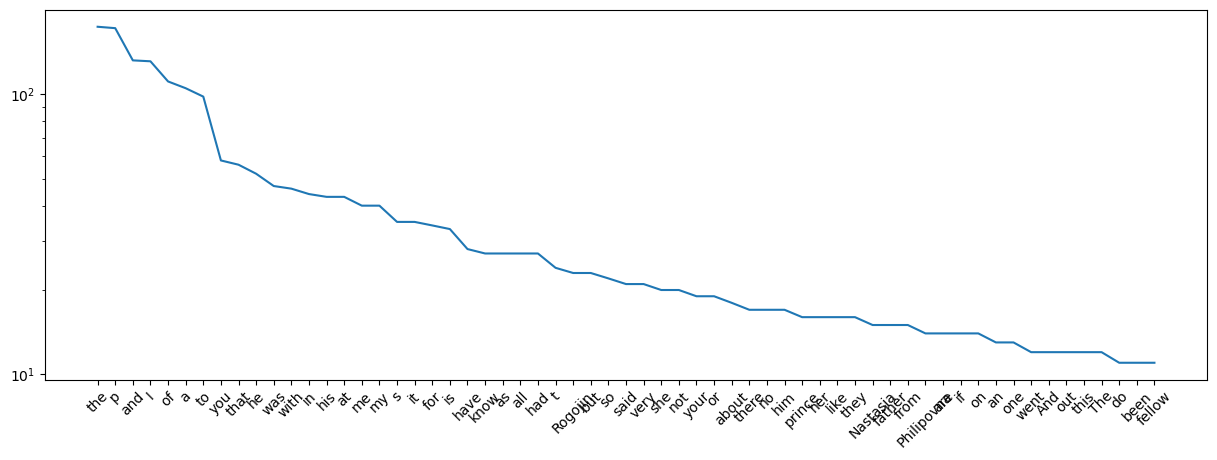

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

keys = sorted_freq.keys()
values = sorted_freq.values()

plt.figure().set_figwidth(15)
plt.xticks(rotation = 45)
plt.semilogy(keys, values)
# plt.loglog(keys, values) ??????????
plt.show()